In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import misc
import cv2

In [2]:
from lib.pca.utils import center_data, pca

### Part 1

In [3]:
pca_dataset = np.genfromtxt("datasets/pca/pca_dataset.txt", dtype='double')
print("Shape of the dataset =", pca_dataset.shape)

Shape of the dataset = (100, 2)


#### Plot the points of the pca_dataset onto a graph.

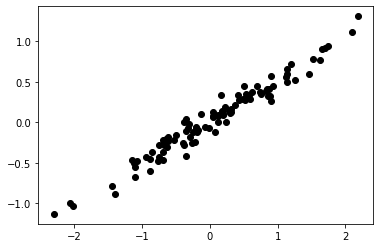

In [4]:
plt.plot(pca_dataset[:,0], pca_dataset[:,1], 'o', color='black');

#### Plot the centered data onto the privious graph  

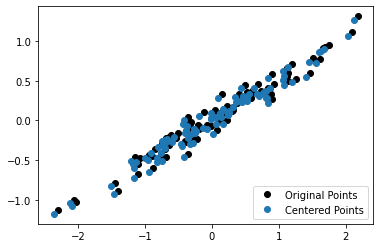

In [5]:
dataset_centered = center_data(pca_dataset)

plt.plot(pca_dataset[:,0], pca_dataset[:,1], 'o', color='black');
plt.plot(dataset_centered[:,0], dataset_centered[:,1], 'o');
plt.legend(('Original Points', 'Centered Points'), loc='lower right')

#### Plot the projected points

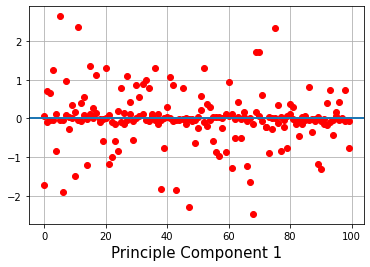

In [6]:
projected_points, r, energy, V = pca(1, dataset_centered)
plt.plot(projected_points, "ro")
plt.grid()
plt.xlabel("Principle Component 1", fontsize=15)
# plt.ylabel("Principle Component 2", fontsize=15)
plt.axhline(0, lw=2);
# plt.axhline(0, lw=2)

#### Plot the terse lines from the center of the dataset in the direction of the 2 principle components.

[-0.88632872 -0.45559198]
[ 0.03785718 -0.07364902]


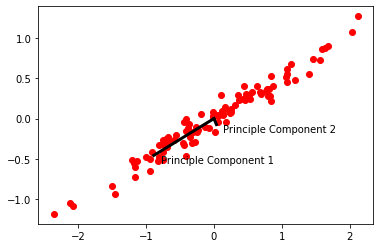

In [7]:
plt.plot(dataset_centered[:,0], dataset_centered[:,1], "ro"); 
count = 0
for l, v in zip(energy, V):
    pc_vector = v * np.sqrt(l)
    print(pc_vector)
    plt.plot([0,pc_vector[0]], [0,pc_vector[1]], "k", lw=3)
    plt.text(pc_vector[0]+0.1, pc_vector[1]-0.1, "Principle Component %s" % (count+1), fontsize=10)
    count += 1

### Part 2

Shape = (768, 1024, 3)


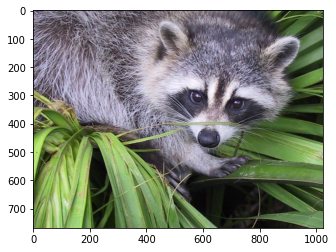

In [8]:
face = misc.face()
print("Shape =", face.shape)
plt.imshow(face)

#### Convert image to gray scale and rescale and subtract the mean from all the pixel points.

Initial shape = (768, 1024)
Resized shape = (185, 249)


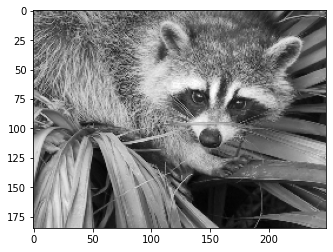

In [9]:
face_gray = misc.face(gray=True)
print("Initial shape =", face_gray.shape)

face_gray_resized = cv2.resize(face_gray,(249,185))
print("Resized shape =", face_gray_resized.shape)
plt.imshow(face_gray_resized, cmap='gray')

Resized shape = (185, 249)


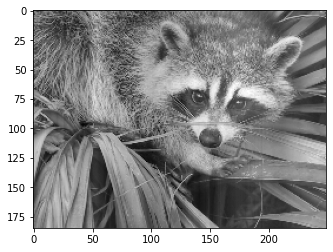

In [10]:
img_centered = center_data(face_gray_resized)
print("Resized shape =", img_centered.shape)
plt.imshow(img_centered, cmap='gray')

#### Reconstruct the image and calculate the total energy captured using 185, 120, 50 and 10 principle components. 

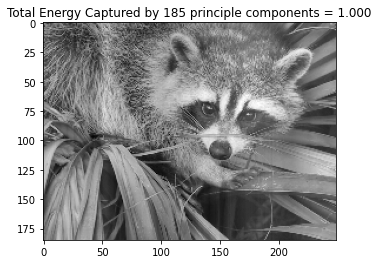

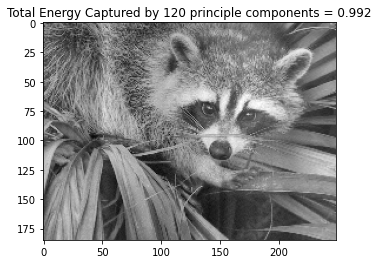

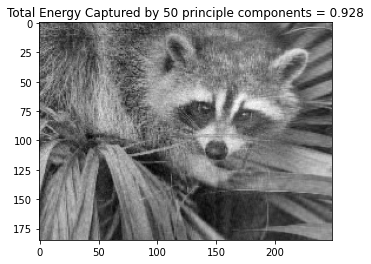

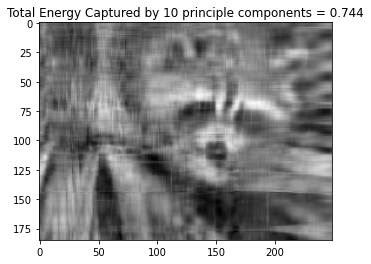

In [11]:
principle_components = [185, 120, 50, 10]
for pc in principle_components:
    p, reconstructed_img, energy, V = pca(pc, img_centered)
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title("Total Energy Captured by %d principle components = %.3f" % (pc, np.sum(energy[0:pc])))
    plt.show()

### Part 3

In [12]:
data = np.genfromtxt("datasets/pca/data_DMAP_PCA_vadere.txt", dtype='double')
print("Shape =", data.shape)

Shape = (1000, 30)


#### Visualize the path of the first 2 pedestrians in the 2 Dimensional space.

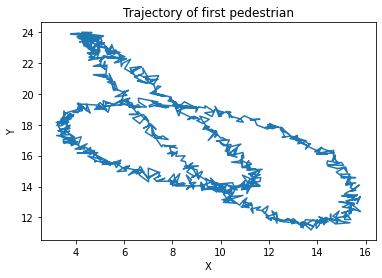

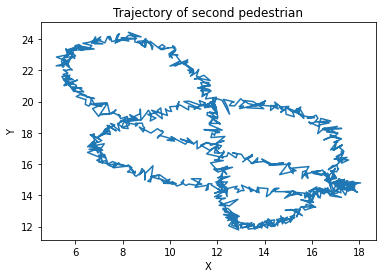

In [13]:
plt.plot(data[:,0], data[:,1]);
plt.title("Trajectory of first pedestrian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.plot(data[:,2], data[:,3]);
plt.title("Trajectory of second pedestrian")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
data_centered = center_data(data)

#### Reconstruct the data set using 2 principle components.

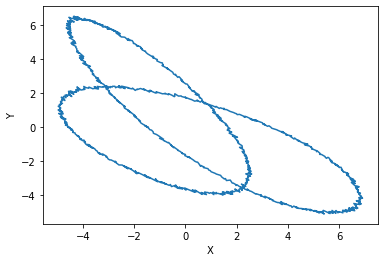

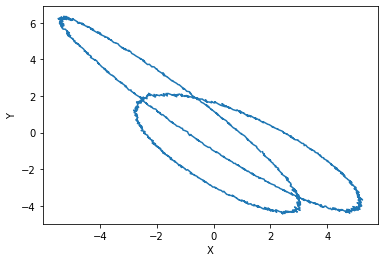

Energy captured by each component = [0.47330561 0.37594081]
Total Energy Captured = 0.8492464226063752


In [15]:
p, reconstructed_data, energy, V = pca(2, data_centered)
plt.plot(reconstructed_data[:,0], reconstructed_data[:,1]);
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(reconstructed_data[:,2], reconstructed_data[:,3]);
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print("Energy captured by each component =", energy[0:2])
print("Total Energy Captured =", np.sum(energy[0:2]))

#### Reconstruct the data set using 3 principle components.

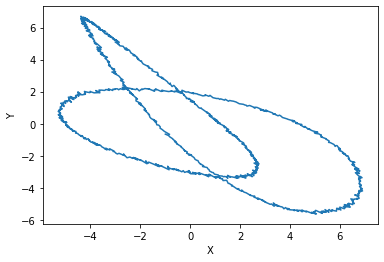

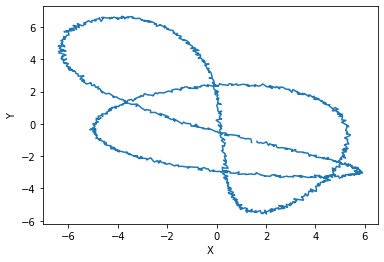

Energy captured by each component = [0.47330561 0.37594081 0.14788461]
Total Energy Captured = 0.9971310341299294


In [16]:
p, reconstructed_data, energy, V = pca(3, data_centered)
plt.plot(reconstructed_data[:,0], reconstructed_data[:,1]);
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.plot(reconstructed_data[:,2], reconstructed_data[:,3]);
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print("Energy captured by each component =", energy[0:3])
print("Total Energy Captured =", np.sum(energy[0:3]))